### Data 606 Data Cleaning and Text Summerization

In [1]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob

In [3]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
df = pd.read_csv("/content/ArticlesText1000.csv")            

In [6]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,"Betegón, Elena; Rodríguez-Medina, Jairo; del-V...",Int J Environ Res Public Health,NaN,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,Introduction\n\nAdolescence is considered as a...
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,"Fisman, D.; Greer, A. L.; Tuite, A.",NaN,NaN,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,Introduction\n\nSince the COVID-19 pandemic wa...
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,"Amano, Shiho; Ohta, Ryuichi; Sano, Chiaki",Cureus,NaN,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,Introduction\n\nNatural killer T (NKT) cell ly...
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,"Kershner, Ariel M.; Hollingworth, Andrew",Atten Percept Psychophys,NaN,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,Introduction\n\nTo perform most real-world act...
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,"Clouston, Sean A. P.; Luft, Benjamin J.; Sun, ...",Sci Rep,NaN,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,Scientific Reports\n\n| (2021) 11:23414 | http...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          1000 non-null   object 
 1   sha               1000 non-null   object 
 2   source_x          1000 non-null   object 
 3   title             1000 non-null   object 
 4   doi               969 non-null    object 
 5   pmcid             910 non-null    object 
 6   pubmed_id         820 non-null    object 
 7   license           1000 non-null   object 
 8   abstract          875 non-null    object 
 9   publish_time      1000 non-null   object 
 10  authors           996 non-null    object 
 11  journal           929 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  0 non-null      float64
 14  arxiv_id          36 non-null     float64
 15  pdf_json_files    1000 non-null   object 
 16  pmc_json_files    804 non-null    object 
 

In [8]:
df.isna().sum()

cord_uid               0
sha                    0
source_x               0
title                  0
doi                   31
pmcid                 90
pubmed_id            180
license                0
abstract             125
publish_time           0
authors                4
journal               71
mag_id              1000
who_covidence_id    1000
arxiv_id             964
pdf_json_files         0
pmc_json_files       196
url                    0
s2_id                148
body_text              0
dtype: int64

In [9]:
df.shape

(1000, 20)

In [10]:
df.describe()

,mag_id,who_covidence_id,arxiv_id,s2_id
count,0.0,0.0,36.000000,8.520000e+02
mean,NaN,NaN,2050.523114,2.147824e+08
std,NaN,NaN,193.143117,6.011818e+07
min,NaN,NaN,1006.012300,1.082400e+04
25%,NaN,NaN,2007.082713,2.211093e+08
50%,NaN,NaN,2104.062085,2.324793e+08
75%,NaN,NaN,2108.047755,2.400733e+08
max,NaN,NaN,2205.056080,2.491293e+08


#### Cleaning and Preprocessing the data

The stop-word function’s purpose was to skim over the dataset and remove stop-words which are to iterate “a”, “the”, “is”, and “are” etc. This would result in accurate results for displaying data.

I also used the function “.join(x.lower()” to make all letters into lowercase letters.

In [11]:
stop_words = stopwords.words('english')
df = df[df['body_text'].notnull()]
df['body_text']=df['body_text'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop_words))
df['body_text'].head(10)

0    introduction adolescence considered transition...
1    introduction since covid-19 pandemic declared ...
2    introduction natural killer t (nkt) cell lymph...
3    introduction to perform real-world activities,...
4    scientific reports | (2021) 11:23414 | https:/...
5    | introduction the emergence novel public heal...
6    the mainstay asthma management fast becoming c...
7    lernens 7 zugleich als "enhancement"-dispositi...
8    introduction severe acute respiratory syndrome...
9    theoretical framework thresholded lamp-osd in ...
Name: body_text, dtype: object

In [12]:
#Deletes punctuation
#Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df['body_text']=df['body_text'].str.replace('[^\w\s]','')
df['body_text'].head(10)

<ipython-input-12-48c64138ad5c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['body_text']=df['body_text'].str.replace('[^\w\s]','')


0    introduction adolescence considered transition...
1    introduction since covid19 pandemic declared w...
2    introduction natural killer t nkt cell lymphom...
3    introduction to perform realworld activities p...
4    scientific reports  2021 1123414  httpsdoiorg1...
5     introduction the emergence novel public healt...
6    the mainstay asthma management fast becoming c...
7    lernens 7 zugleich als enhancementdispositiv z...
8    introduction severe acute respiratory syndrome...
9    theoretical framework thresholded lamposd in l...
Name: body_text, dtype: object

In [13]:
#Count the number of words in Articles
#Reference: https://towardsdatascience.com/9-functions-that-make-natural-language-pre-processing-a-piece-of-cake-8b885c151955
df['number_words']=[len(x.split()) for x in df['body_text'].tolist()]
df.head(10)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,...,Int J Environ Res Public Health,NaN,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,...,NaN,NaN,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,...,Cureus,NaN,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,...,Atten Percept Psychophys,NaN,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,...,Sci Rep,NaN,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767
5,p6maxwnz,8bfe1dbfcfa3e3f1e0c2284f51ef09c991bba946,Medline; PMC; WHO,Greek teachers' resilience levels during the C...,10.1002/pits.22709,PMC9088383,35572178.0,no-cc,The mandatory closure of schools due to the Co...,2022-04-27,...,Psychol Sch,NaN,NaN,NaN,document_parses/pdf_json/8bfe1dbfcfa3e3f1e0c22...,document_parses/pmc_json/PMC9088383.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35572178/;...,248692999.0,introduction the emergence novel public healt...,3543
6,r1ao540t,8740732439d504fa76487172c1757d79ea451a7e,Medline; PMC; WHO,Asthma management and impact on COVID‐19 outcomes,10.1111/cea.14000,PMC8653073,34476864.0,no-cc,NaN,2021-09-02,...,Clin Exp Allergy,NaN,NaN,NaN,document_parses/pdf_json/8740732439d504fa76487...,document_parses/pmc_json/PMC8653073.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34476864/;...,237392395.0,the mainstay asthma management fast becoming c...,640
7,xxhydcq8,d2ab521a19a90baddae4bafb53b200b8eaa37e84,PMC,Narrative Wissenschaft und die Notwendigkeit n...,10.1007/978-3-658-32916-7_2,PMC7979100,NaN,no-cc,"Vom Leben handeln die Geschichten, welche die ...",2021-03-20,...,Gew&#x000e4;hrleistungsstaatlichkeit zwischen ...,NaN,NaN,NaN,document_parses/pdf_json/d2ab521a19a90baddae4b...,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,NaN,lernens 7 zugleich als enhancementdispositiv z...,3920
8,ko490awu,b8cb818450df2d8001b5fe6a8708e21720e4bfd3,Medline; PMC,The SARS-CoV-2 B.1.1.529 Omicron virus causes ...,10.21203/rs.3.rs-1211792/v1,PMC8722607,34981044.0,cc-by,Despite the 

#### Sentimental Analysis

In [14]:
df['body_text']= df['body_text'].astype(str)

In [15]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Below Sentiment Analysis was perfromed where we find the polarity and subjectivity based on the documents presented.

Polarity refers to the degree to which a text expresses positive or negative sentiment. In other words, polarity reflects the overall emotional tone of the text. Lies in the range of [-1,1].

Subjectivity, on the other hand, refers to the degree to which a text expresses a personal opinion, belief, or emotion, rather than simply stating objective facts. Lies in the range of [0,1].

In [16]:
df['polarity'] = df['body_text'].apply(pol)
df['subjectivity'] = df['body_text'].apply(sub)
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,PMC8955671,35329290,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,...,NaN,NaN,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169,0.125116,0.362164
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,NaN,NaN,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,...,NaN,NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476,0.076783,0.352559
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,PMC8789203,35106246.0,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,...,NaN,NaN,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253,0.082477,0.393236
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,PMC9010067,35426031,no-cc,We examined how object categories and scene co...,2022-04-14,...,NaN,NaN,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089,0.025905,0.371068
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,PMC8642440,34862487.0,cc-by,The goal of the present work was to examine cl...,2021-12-03,...,NaN,NaN,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767,0.055562,0.441050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,noh68ilh,11985de9e2d3345b9a7d694e67caada3a41a0f72,Elsevier; Medline; PMC,Human milk oligosaccharides: Shaping the infan...,10.1016/j.jff.2020.104074,PMC7332462,32834834.0,no-cc,Human milk oligosaccharides (HMO) are complex ...,2020-07-03,...,NaN,NaN,document_parses/pdf_json/11985de9e2d3345b9a7d6...,document_parses/pmc_json/PMC7332462.xml.json,https://doi.org/10.1016/j.jff.2020.104074; htt...,220303372.0,introduction breast milk optimal nutrition inf...,4986,0.102361,0.403003
996,wdpgo5km,049ea8899e4cd0666b0098adac0fe9d50bf669a4,Elsevier; Medline; PMC,Long-term production effects of clinical crypt...,10.1016/j.ijpara.2020.03.002,PMC7194893,32277986.0,els-covid,Abstract Cryptosporidiosis can have a devastat...,2020-04-08,...,NaN,NaN,document_parses/pdf_json/049ea8899e4cd0666b009...,document_parses/pmc_json/PMC7194893.xml.json,https://doi.org/10.1016/j.ijpara.2020.03.002; ...,215742115.0,introduction cryptosporidiosis calves commonly...,2349,0.050143,0.459944
997,fz7tdmj0,3bc67e2a95d5b71f1fcade937817edbd0c3d0384,Medline; PMC,Potential detrimental role of soluble ACE2 in ...,10.1002/rmv.2213,PMC8014495,33426683.0,no-cc,Severe acute respiratory syndrome coronavirus ...,2021-01-10,...,NaN,NaN,document_parses/pdf_json/3bc67e2a95d5b71f1fcad...,document_parses/pmc_json/PMC8014495.xml.json,https://doi.org/10.1002/rmv.2213; https://www....,231575925.0,introduction the pandemic coronavirus disease...,2308,0.054301,0.4

In [17]:
df['polarity'] = df['polarity'].round(2)
df['subjectivity'] = df['subjectivity'].round(2)
df.sample(5)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,...,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
521,qtfbgyi0,cb4b21eae43148fe4bf7a376caea6e8a06f9e1ae,Medline; PMC; WHO,Vaccination provides protection from respirato...,10.1002/jmv.27666,PMC9088639,35187697.0,no-cc,Outcomes of 109 hospitalized COVID‐19 patients...,2022-02-26,...,NaN,NaN,document_parses/pdf_json/cb4b21eae43148fe4bf7a...,document_parses/pmc_json/PMC9088639.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35187697/;...,247010483.0,january 27th 2020 first available mrna vaccine...,501,0.09,0.50
834,en1zacn7,045c28b152bd6d324ef0608bd516be309944ee8d,PMC,Factors associated with delirium among survivo...,10.1186/s12890-021-01714-0,PMC8559136,34724913,cc-by,"BACKGROUND: The prevalence of delirium, its as...",2021-11-01,...,NaN,NaN,document_parses/pdf_json/045c28b152bd6d324ef06...,document_parses/pmc_json/PMC8559136.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,for critically ill patients icu reported preva...,1823,0.08,0.43
396,dz9pmc9i,b7cc7b30a5d1b50d1f5f16a95ce721bf49a73778,Elsevier; Medline; PMC,Immunomodulation for the management of severe ...,10.1016/j.bbrc.2020.11.084,PMC7699161,33303188.0,no-cc,This Mini Review of the literature aimed to as...,2020-11-28,...,NaN,NaN,document_parses/pdf_json/b7cc7b30a5d1b50d1f5f1...,document_parses/pmc_json/PMC7699161.xml.json,https://api.elsevier.com/content/article/pii/S...,227188672.0,introduction first identified end 2019 midst o...,1233,0.06,0.43
835,9xto10ti,9e18f23ab41a406328f87c6212bf41c18fba21c0,Medline; PMC; WHO,DNA Vaccines Expressing the Envelope and Membr...,10.3389/fimmu.2022.827605,PMC8907653,35281016.0,cc-by,The coronavirus disease 2019 (COVID-19) pandem...,2022-02-24,...,NaN,NaN,document_parses/pdf_json/9e18f23ab41a406328f87...,document_parses/pmc_json/PMC8907653.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35281016/;...,247061192.0,introduction severe acute respiratory syndrome...,2019,0.09,0.41
778,2a3qqmoe,d114696a3c077ded9956bff9821e6c9b1a56ce32,Medline; PMC,Molecular identification of infectious bronchi...,10.1007/s11033-020-05788-7,PMC7474476,32892307.0,no-cc,"Infectious Bronchitis (IB) is an acute, highly...",2020-09-05,...,NaN,NaN,document_parses/pdf_json/d114696a3c077ded9956b...,document_parses/pmc_json/PMC7474476.xml.json,https://doi.org/10.1007/s11033-020-05788-7; ht...,221524332.0,introduction infectious bronchitis considered ...,1704,0.04,0.38


In [18]:
df = df.drop(columns=['mag_id','who_covidence_id','arxiv_id','pmcid','pubmed_id'])

In [19]:
df.isna().sum()

cord_uid            0
sha                 0
source_x            0
title               0
doi                31
license             0
abstract          125
publish_time        0
authors             4
journal            71
pdf_json_files      0
pmc_json_files    196
url                 0
s2_id             148
body_text           0
number_words        0
polarity            0
subjectivity        0
dtype: int64

#### Displaying the Polarity values within the text.

In [20]:
df3=df[['cord_uid','polarity']]
df3.head(5)

,cord_uid,polarity
0,17nxenn8,0.13
1,8zq5mdg9,0.08
2,jlnk2hvh,0.08
3,ikou5i6n,0.03
4,asiedayl,0.06


In [21]:
article=df3.groupby(['cord_uid'])['polarity'].mean()
article=pd.DataFrame(article)
article

,polarity
cord_uid,
02w5j2zt,0.09
03z2slom,0.07
04me5fix,0.07
064jleve,0.10
06izdji8,0.09
...,...
zvk9jby7,0.06
zwsca0xp,0.10
zxyf2y5u,0.10


Text(0.5, 0, '')

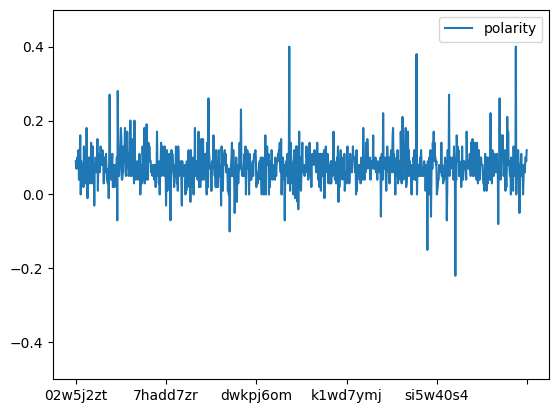

In [22]:
article.iloc[0:1000].plot()

plt.ylim(-.5, .5)

plt.xlabel('')

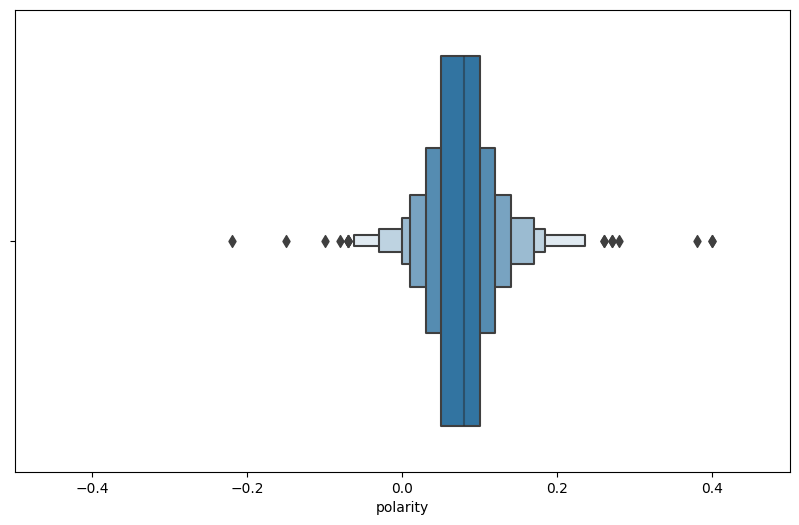

In [23]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='polarity', data=article)

plt.xlim(-0.5, .5)

plt.show();

In [24]:
greater_than_zero=article[article['polarity']>0].count()
greater_than_zero[0]

951

In [25]:
lesser_than_zero=article[article['polarity']<0].count()
lesser_than_zero[0]

25

In [26]:
equal_to_zero=article[article['polarity']==0].count()
equal_to_zero[0]

24

#### Displaying the Subjectivity values within the text.

In [27]:
df4=df[['cord_uid','subjectivity']]
df4.head(5)

,cord_uid,subjectivity
0,17nxenn8,0.36
1,8zq5mdg9,0.35
2,jlnk2hvh,0.39
3,ikou5i6n,0.37
4,asiedayl,0.44


In [28]:
article1=df4.groupby(['cord_uid'])['subjectivity'].mean()
article1=pd.DataFrame(article1)
article1

,subjectivity
cord_uid,
02w5j2zt,0.36
03z2slom,0.38
04me5fix,0.45
064jleve,0.47
06izdji8,0.46
...,...
zvk9jby7,0.35
zwsca0xp,0.44
zxyf2y5u,0.45


Text(0.5, 0, '')

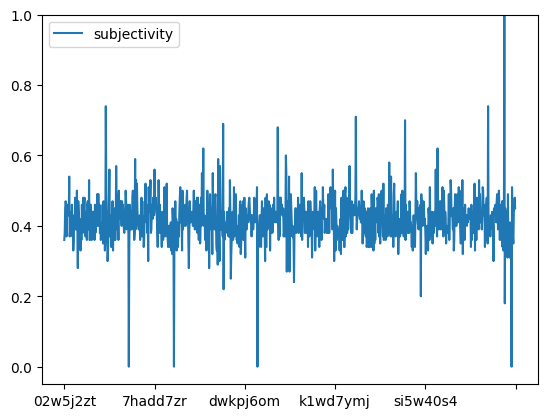

In [29]:
article1.iloc[0:1000].plot()

plt.ylim(-0.05, 1)

plt.xlabel('')

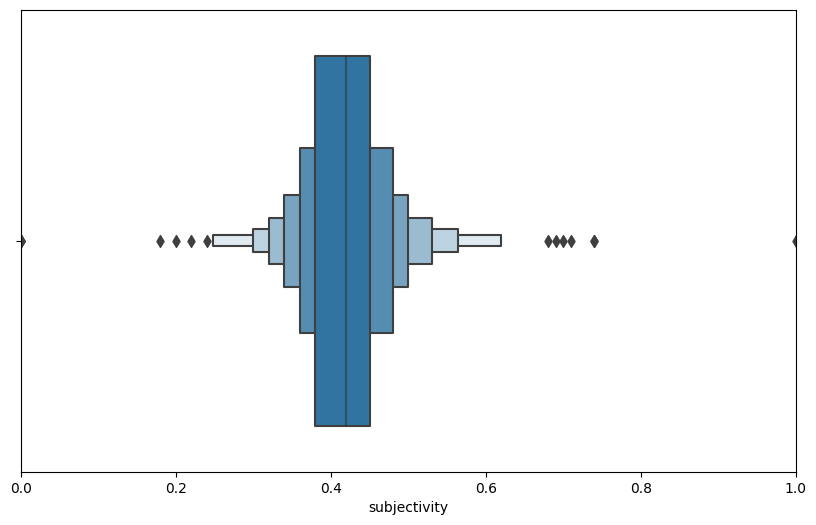

In [30]:
plt.figure(figsize=(10,6))
sns.boxenplot(x='subjectivity', data=article1)
plt.xlim(0, 1)
plt.show();

In [31]:
greater_than_zero=article1[article1['subjectivity']>0].count()
greater_than_zero[0]

996

In [32]:
lesser_than_zero=article1[article1['subjectivity']<0].count()
lesser_than_zero[0]

0

In [33]:
equal_to_zero=article1[article1['subjectivity']==0].count()
equal_to_zero[0]

4

#### Correlation Matrix section

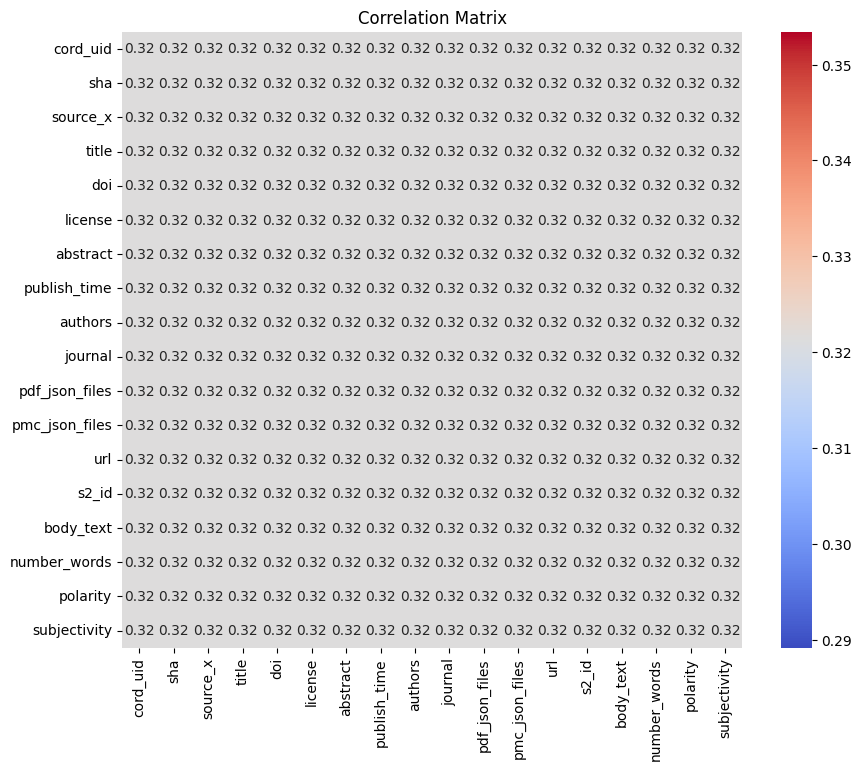

In [34]:
import pandas as pd
import seaborn as sns
from scipy import stats
df_corr = pd.DataFrame()
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df['polarity'], df['subjectivity'])
        df_corr.loc[x,y] = corr[0]

#heatmap of the correlation matrix using Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#code reference: https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas

In [35]:
df.head()

,cord_uid,sha,source_x,title,doi,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,"Betegón, Elena; Rodríguez-Medina, Jairo; del-V...",Int J Environ Res Public Health,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169,0.13,0.36
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,"Fisman, D.; Greer, A. L.; Tuite, A.",NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476,0.08,0.35
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,"Amano, Shiho; Ohta, Ryuichi; Sano, Chiaki",Cureus,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253,0.08,0.39
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,no-cc,We examined how object categories and scene co...,2022-04-14,"Kershner, Ariel M.; Hollingworth, Andrew",Atten Percept Psychophys,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089,0.03,0.37
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,cc-by,The goal of the present work was to examine cl...,2021-12-03,"Clouston, Sean A. P.; Luft, Benjamin J.; Sun, ...",Sci Rep,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767,0.06,0.44


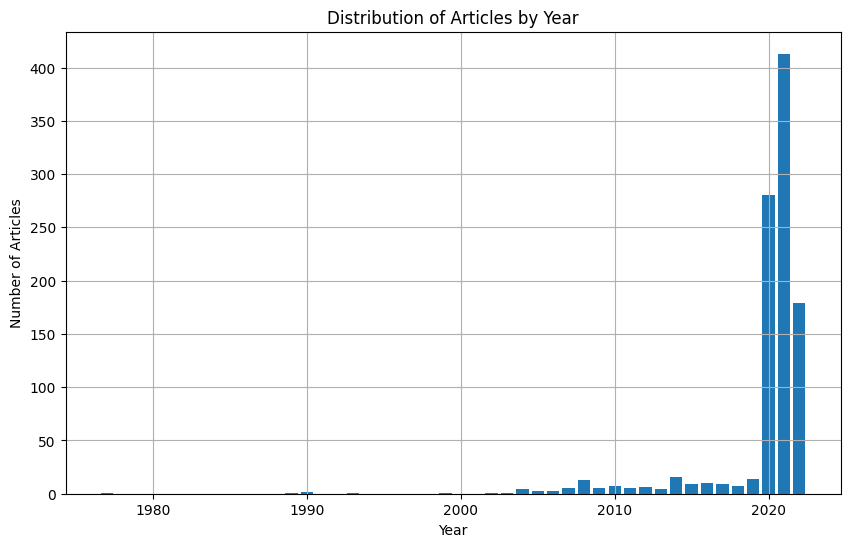

In [37]:
import datetime
df['publish_year'] = pd.to_datetime(df['publish_time']).dt.year
year_counts = df['publish_year'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Year')
plt.grid()
plt.show()

##### just check below we have
 https://www.kaggle.com/code/divyapatel4/topic-modelling-and-visualization-using-n

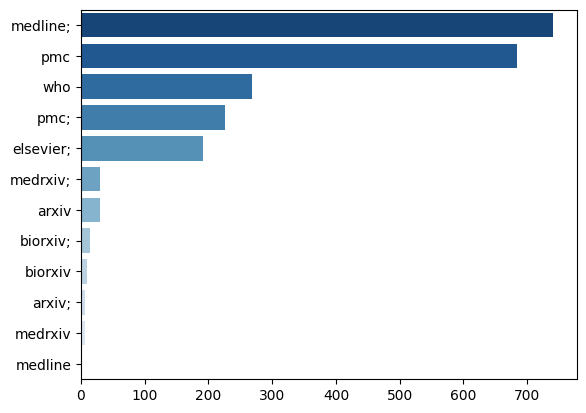

In [38]:
### This will tells us from which source the data set has data collected from and we can also observe that most of the source from PMC.
word_count_1 = df['source_x'].str.lower().str.split(expand=True).stack().value_counts()

# Ploting the top 15 words with their count using Seaborn
top15 = word_count_1[:15]
sns.barplot(x=top15.values, y=top15.index, palette='Blues_r')
plt.show()

#### Top 15 words with highest word count

In [39]:
pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


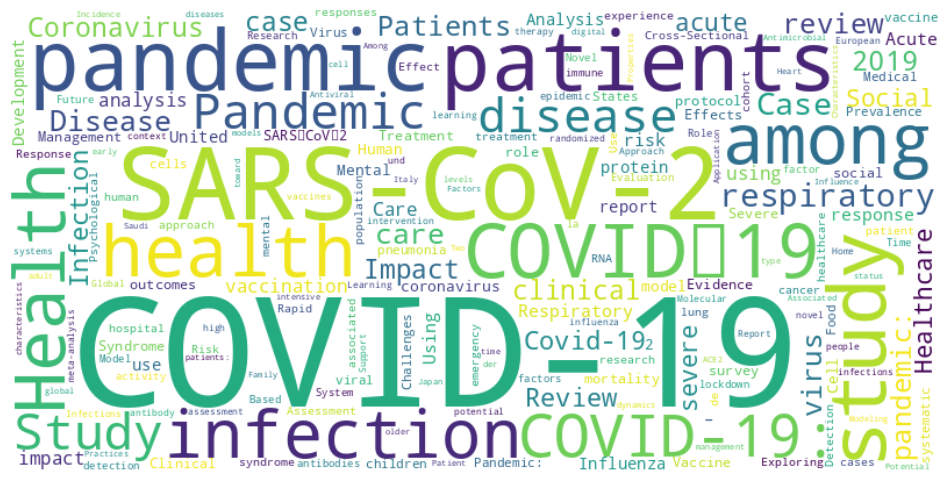

In [40]:
from wordcloud import WordCloud

text = ' '.join(df['title'])
# Spliting the text into individual words and remove common stopwords
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
words = text.split()
words = [word for word in words if word.lower() not in stopwords]
# Counting the frequency of each word
word_counts = pd.Series(words).value_counts()

# Created a wordcloud of the most common words
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Ref: 1. https://amueller.github.io/word_cloud/ and 2. https://www.nltk.org/book/ch02.html#sec-stopwords

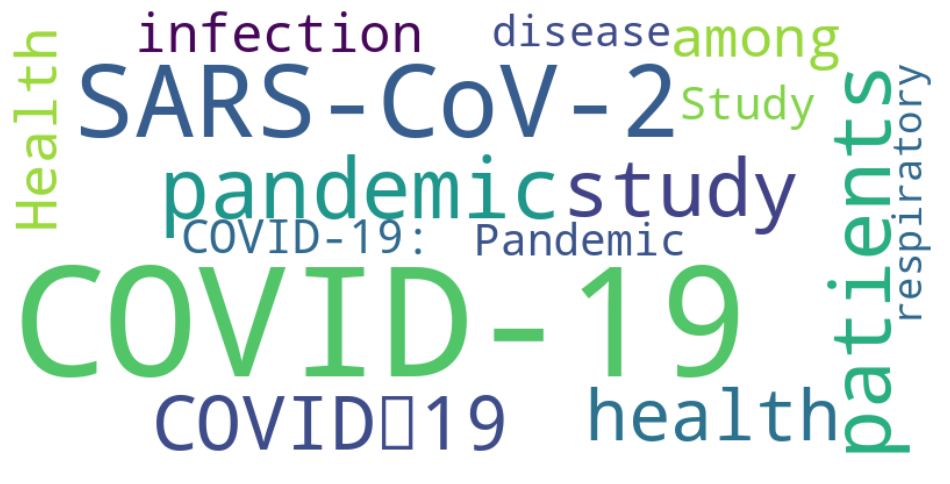

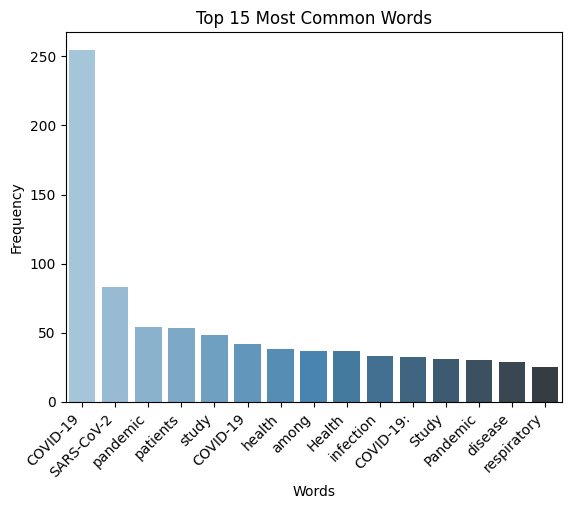

In [41]:
top_words = word_counts.head(15)

# Created a wordcloud of the most common words
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(top_words)

# Ploting the wordcloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##printing the top15 words in the barplot 

sns.barplot(x=top_words.index, y=top_words.values, palette='Blues_d')
plt.title('Top 15 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### top 5 Articles which contain only less number of words

                                                 title  number_words
763  Genes and genome editing tools for breeding de...             3
827  SARS-CoV-2 screening among people living in ho...            12
242  Long‐term antibody response following COVID‐19...            64
520  CHANGES IN HOSPITALIZATION IN CHILDREN DURING ...            69
831  A Higher Antibody Response Is Generated With a...            88


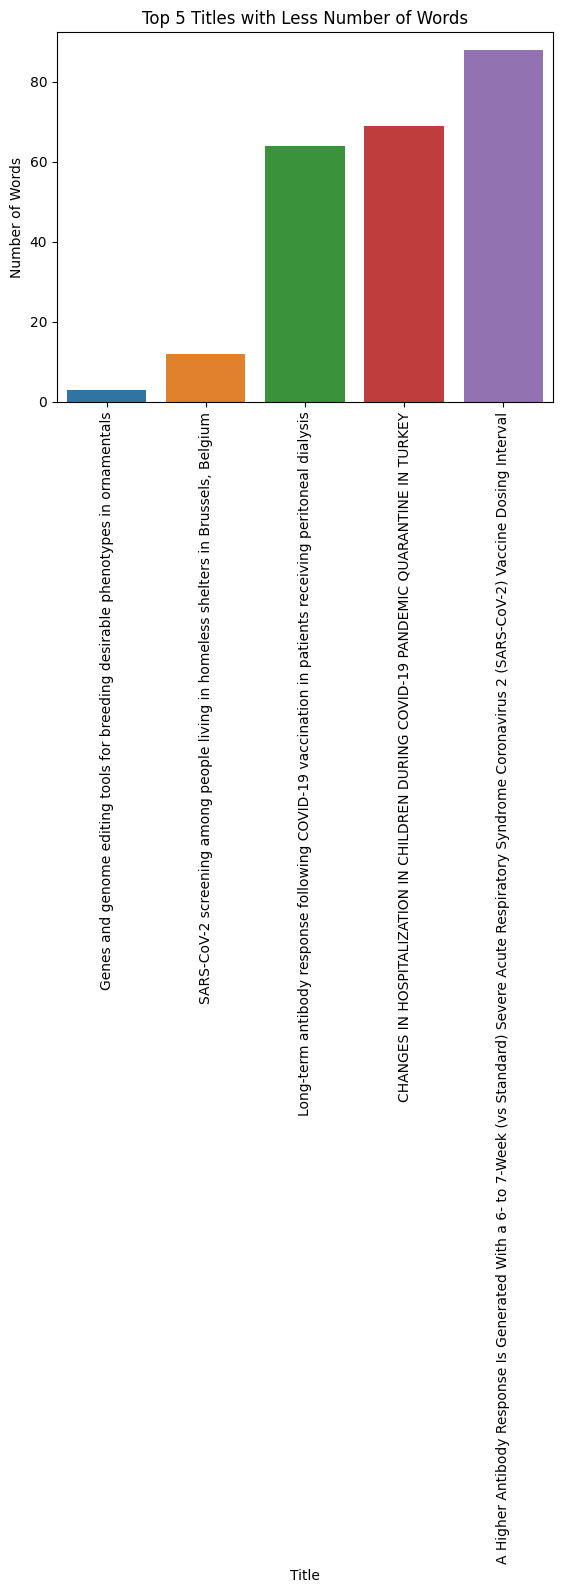

In [42]:
# Sort dataframe by 'number_words' column and select the top 5 rows
top_5_less = df.sort_values(by='number_words').head()
title_less_word_count = top_5_less[['title', 'number_words']]
# Displaying the selected columns
print(title_less_word_count)
# Created a bar plot of the top 5 titles by word count
sns.barplot(x='title', y='number_words', data=top_5_less)
plt.xticks(rotation=90)
plt.title('Top 5 Titles with Less Number of Words')
plt.xlabel('Title')
plt.ylabel('Number of Words')
plt.show()

#### Top 5 Articles which contain only more number of words 

                                                 title  number_words
370  2021 ISHNE/ HRS/ EHRA/ APHRS collaborative sta...         11468
886  COVID-19 in Italy: targeted testing as a proxy...         12076
386  Molecular Design Strategies toward Improvement...         13407
761                  14 Het gastro-intestinale systeem         25761
467                                Symposium Summaries         37514


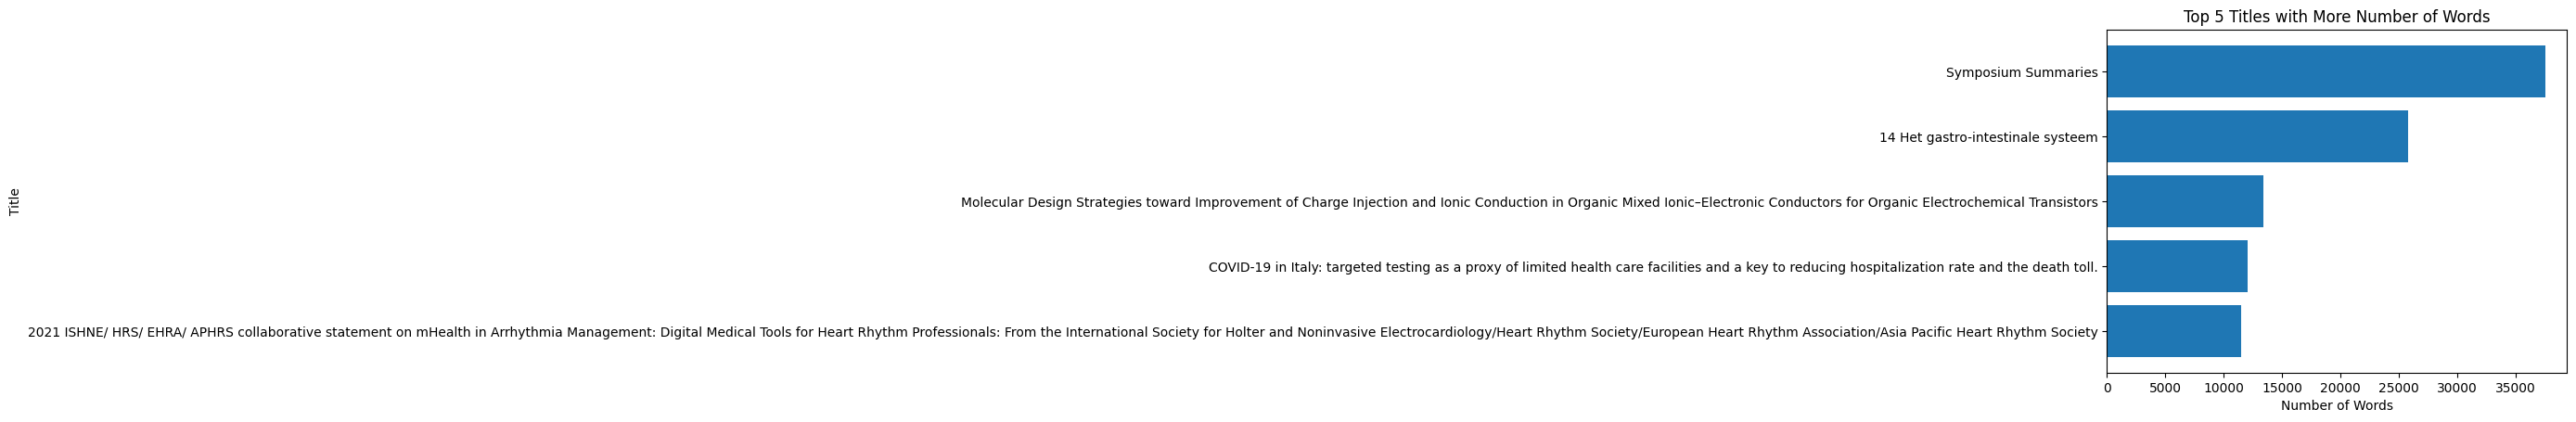

In [43]:
top5_more = df.sort_values(by='number_words').tail()
title_more_word_count = top5_more[['title', 'number_words']]

# Displaying the selected columns
print(title_more_word_count)
# Created a horizontal bar plot of the top 5 titles by word count
plt.barh(y=title_more_word_count['title'], width=title_more_word_count['number_words'])
plt.title('Top 5 Titles with More Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Title')
plt.show()

 https://www.kaggle.com/code/puneetsurya0921/data-analytics-task#Word-Cloud

In [44]:
df.head()

,cord_uid,sha,source_x,title,doi,license,abstract,publish_time,authors,journal,pdf_json_files,pmc_json_files,url,s2_id,body_text,number_words,polarity,subjectivity,publish_year
0,17nxenn8,6acac16c5309dfe036a67272150a63d72c761e97,PMC,Emotion Regulation in Adolescents: Evidence of...,10.3390/ijerph19063602,cc-by,The Cognitive Emotion Regulation Questionnaire...,2022-03-18,"Betegón, Elena; Rodríguez-Medina, Jairo; del-V...",Int J Environ Res Public Health,document_parses/pdf_json/6acac16c5309dfe036a67...,document_parses/pmc_json/PMC8955671.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN,introduction adolescence considered transition...,2169,0.13,0.36,2022
1,8zq5mdg9,382920ece2259d175814c088412bb862b4964817,MedRxiv; WHO,Derivation and Validation of Clinical Predicti...,10.1101/2020.06.21.20136929,medrxiv,Background: SARS-CoV-2 is currently causing a ...,2020-06-23,"Fisman, D.; Greer, A. L.; Tuite, A.",NaN,document_parses/pdf_json/382920ece2259d175814c...,NaN,https://doi.org/10.1101/2020.06.21.20136929; h...,219978668.0,introduction since covid19 pandemic declared w...,2476,0.08,0.35,2020
2,jlnk2hvh,689f70ff362768299fa931247bb1feaf4b4eef10,Medline; PMC,Natural Killer T Cell Intravascular Lymphoma W...,10.7759/cureus.20711,cc-by,Natural killer T cell intravascular lymphoma i...,2021-12-26,"Amano, Shiho; Ohta, Ryuichi; Sano, Chiaki",Cureus,document_parses/pdf_json/689f70ff362768299fa93...,document_parses/pmc_json/PMC8789203.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/35106246/;...,245504912.0,introduction natural killer t nkt cell lymphom...,1253,0.08,0.39,2021
3,ikou5i6n,5d1192296abdc0d3e36f474cb898937b3ea1de2b,Medline; PMC,Real-world object categories and scene context...,10.3758/s13414-022-02475-6,no-cc,We examined how object categories and scene co...,2022-04-14,"Kershner, Ariel M.; Hollingworth, Andrew",Atten Percept Psychophys,document_parses/pdf_json/5d1192296abdc0d3e36f4...,document_parses/pmc_json/PMC9010067.xml.json,https://doi.org/10.3758/s13414-022-02475-6; ht...,248180686.0,introduction to perform realworld activities p...,4089,0.03,0.37,2022
4,asiedayl,091821e84f5aba4eafd7b849eebba3e0596957eb,Medline; PMC; WHO,Clinical risk factors for mortality in an anal...,10.1038/s41598-021-02920-w,cc-by,The goal of the present work was to examine cl...,2021-12-03,"Clouston, Sean A. P.; Luft, Benjamin J.; Sun, ...",Sci Rep,document_parses/pdf_json/091821e84f5aba4eafd7b...,document_parses/pmc_json/PMC8642440.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/34862487/;...,244872451.0,scientific reports 2021 1123414 httpsdoiorg1...,1767,0.06,0.44,2021


In [45]:
print(df.dtypes)

cord_uid           object
sha                object
source_x           object
title              object
doi                object
license            object
abstract           object
publish_time       object
authors            object
journal            object
pdf_json_files     object
pmc_json_files     object
url                object
s2_id             float64
body_text          object
number_words        int64
polarity          float64
subjectivity      float64
publish_year        int64
dtype: object


#### Ploting top 10 common authors of the articles who have published more of jounals.

Li       12
Zhang     9
M.        8
Peter     7
A.        7
Yang      6
Chen      6
Zhou      6
David     5
Tan       5
dtype: int64


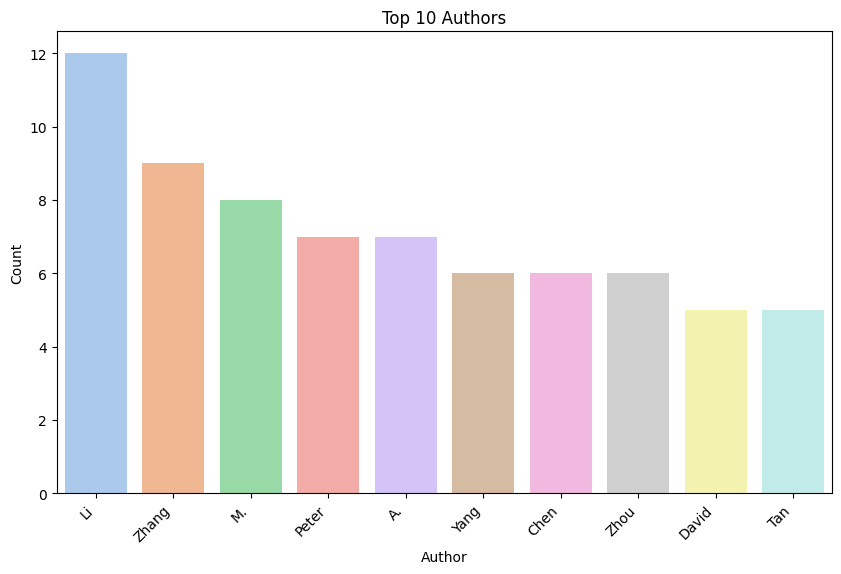

In [47]:
#Here we are extracting authors column
authors = df['authors']
authors_list = [str(author).split(", ") if not pd.isna(author) else [] for author in authors]
common_authors = [author.strip() for sublist in authors_list for author in sublist]
print(pd.Series(common_authors).value_counts().head(10))

#Ploting top 10 common authors of the articles who have published more of jounals.
plt.figure(figsize=(10,6))
sns.countplot(x=pd.Series(common_authors), order=pd.Series(common_authors).value_counts().iloc[:10].index, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Top 10 Authors')
plt.show()